# Importing Required Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 
from sklearn.metrics import classification_report

%matplotlib inline

### Import file with csv extension

In [2]:
insurance=pd.read_csv("insurance.csv")
#information about the file
insurance.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
#make a copy of the file (to avoid changing the original file)
df=insurance.copy()
#information about the copy of the file 
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#file description
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
#file information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Comparison and visualisation of Data

## BMİ
- To interpret the BMI, we create a graph. It can be seen that the general BMI values are concentrated between 25-35.
- his means that their average bmi is higher than the average bmi of a person of normal weight.

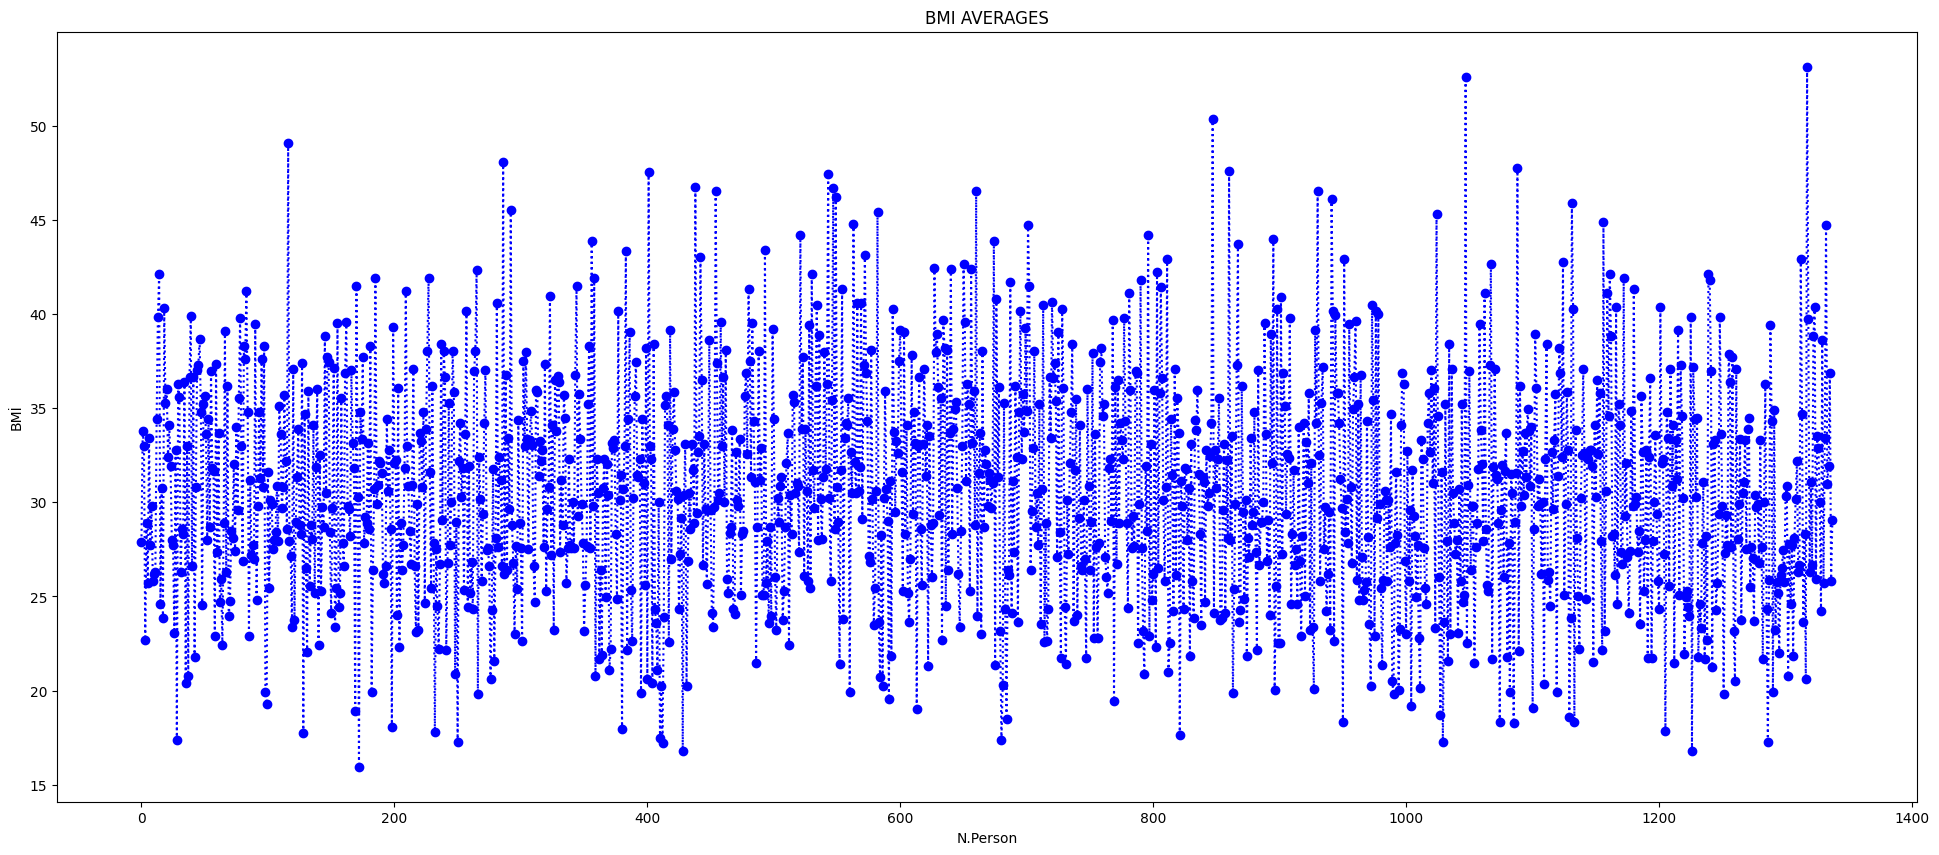

In [6]:

plt.figure(figsize=(24,10))
plt.plot(df.bmi, "bo:")
plt.title("BMI AVERAGES")
plt.xlabel("N.Person")
plt.ylabel("BMİ")
plt.show()

## Smoker-Charges
- The relationship between smoking and salary was analysed here.When the graph is analysed, it can be concluded that cigarette use increases in direct proportion to the increase in salary.
- A graph like the one below is used to explain this situation.

c:\Users\darks\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


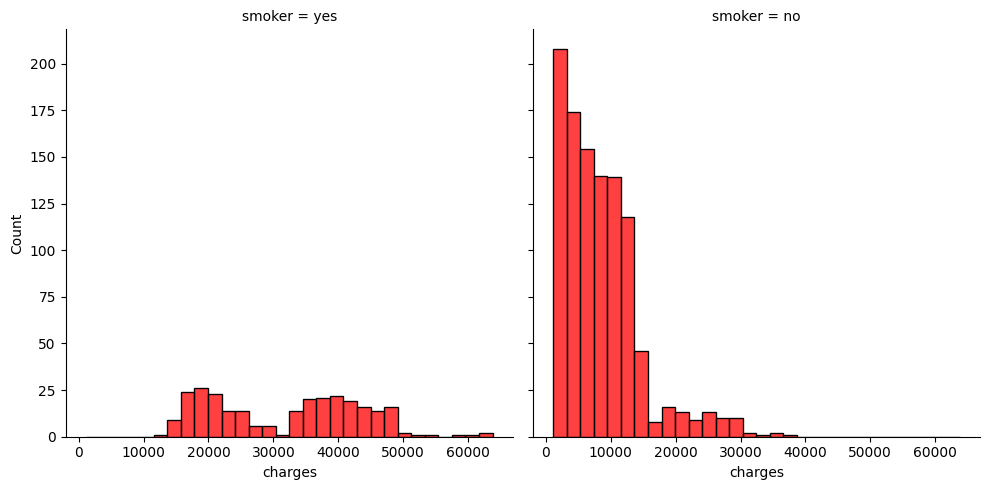

In [7]:
sns.displot(data=df, x="charges", col="smoker",kde=False, color='r');

## Sex-Bmi
- The relationship between sex and bmi was analysed here.
- When the relationship between gender and BMI is analysed, we can conclude that the values are close to each other.
- It is seen that the max BMI value of men is higher than that of women and women are more concentrated in the average BMI index value.

c:\Users\darks\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


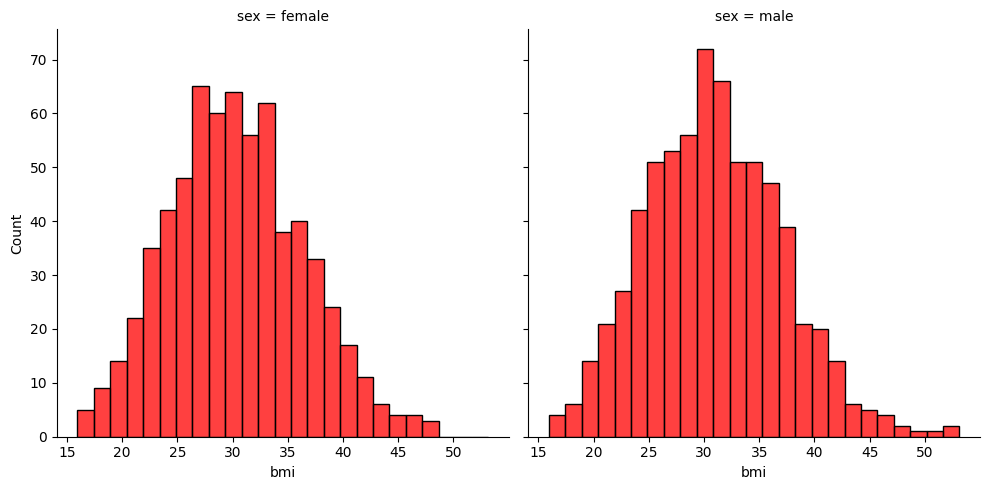

In [8]:
sns.displot(data=insurance, x="bmi", col="sex",kde=False, color='r');

## Children-Region
- The relationship between children and region was analysed here.
- When the graph is analysed,it can be concluded that the average number of children is higher in the south and north west than in the north and south east.

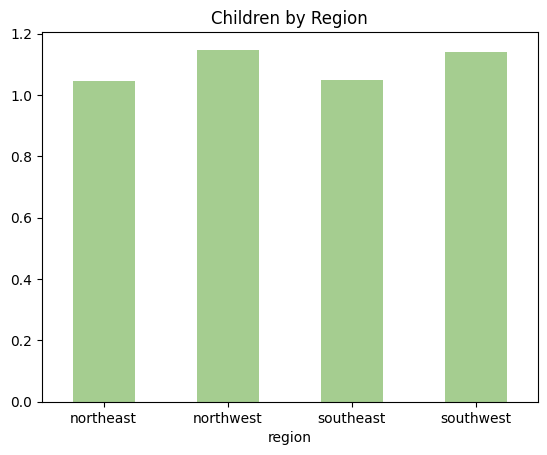

region
northeast    1.046296
northwest    1.147692
southeast    1.049451
southwest    1.141538
Name: children, dtype: float64

In [9]:
region=insurance.groupby('region').children.mean().plot(kind='bar', colormap='crest', title="Children by Region")
for item in region.get_xticklabels():
    item.set_rotation(0)
plt.show()
insurance.groupby('region').children.mean()

## Age-Bmi
- The relationship between age and bmi was analysed here
- The Bmi increases slightly with age, but in the overall graph the average Bmi of the ages is more or less the same, although there are fluctuations.

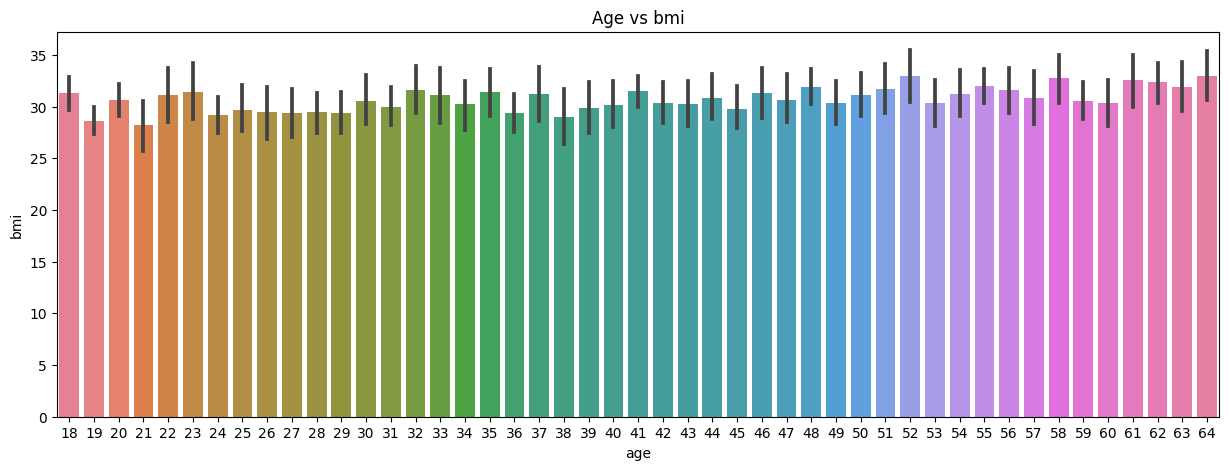

In [10]:
plt.figure(figsize=(15,5))
plt.title('Age vs bmi')
sns.barplot(x='age',y='bmi',data=df,palette='husl');


## Children-Bmi
- The relationship between children and bmi was analysed here.
- It is difficult to conclude from this graph that there is a relationship between the number of children and BMI.


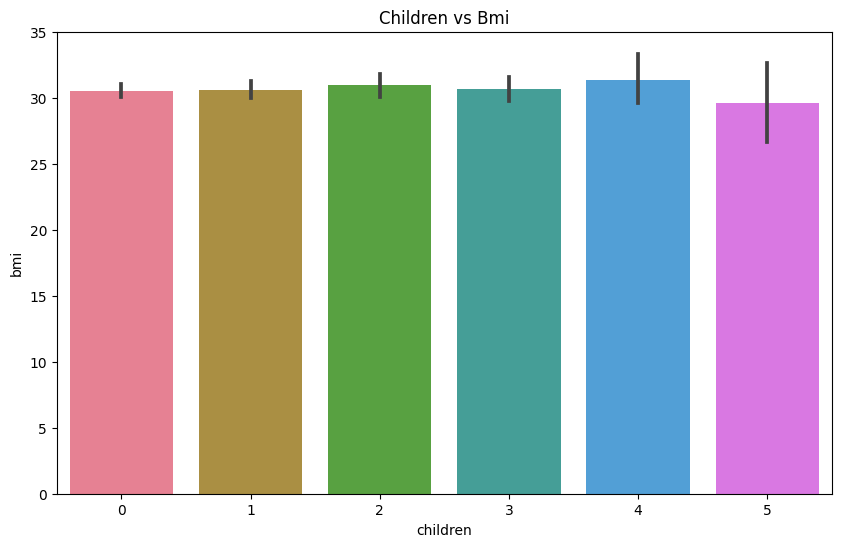

In [11]:
plt.figure(figsize=(10,6))
plt.title('Children vs Bmi')
sns.barplot(x='children',y='bmi',data=df,palette='husl');


## Bmi-outliers
- In this graph, the outlier values of bmi were wanted to be looked at for exploratory purposes and it was observed that there were outliers.

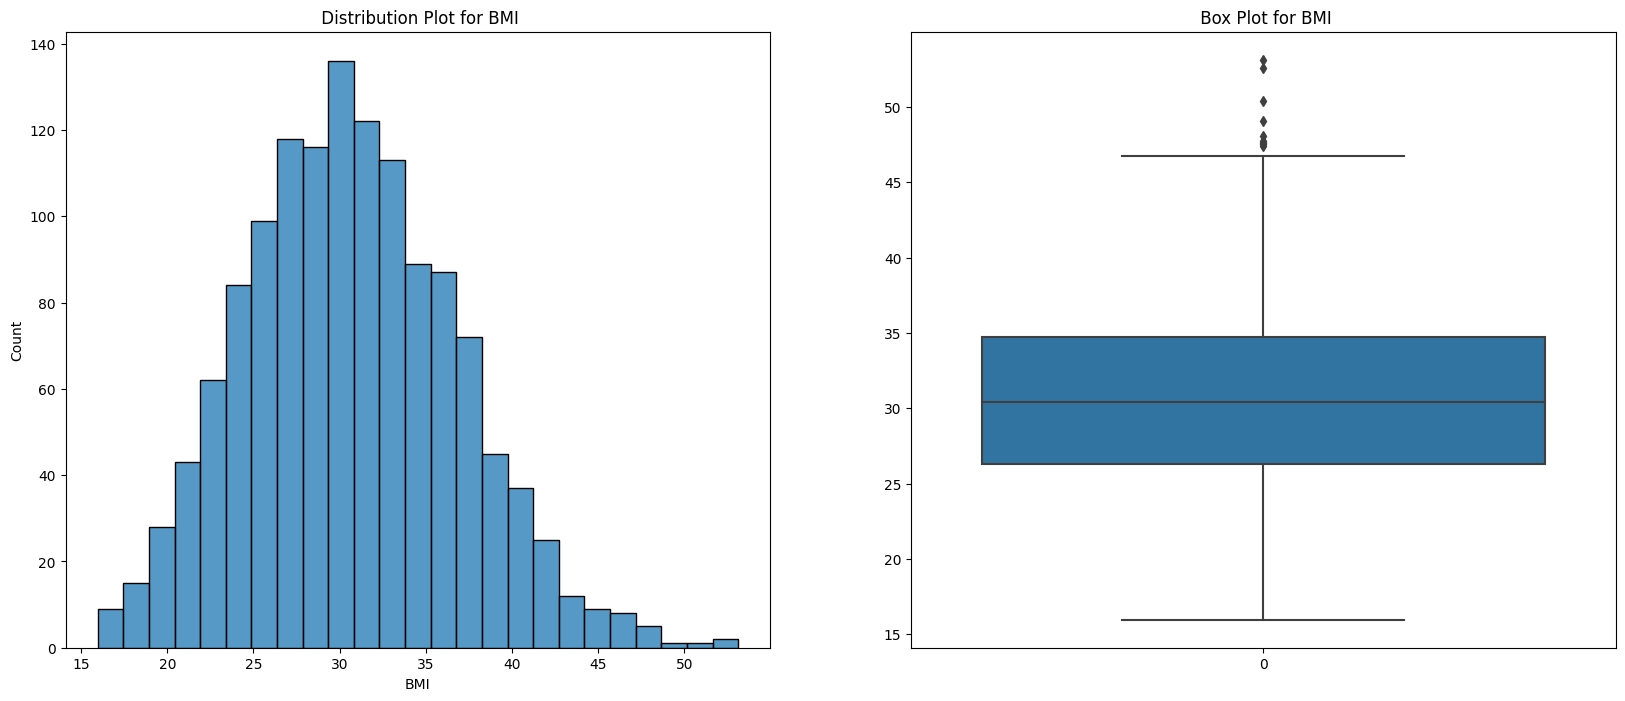

In [12]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.histplot(df['bmi'])
plt.title(' Distribution Plot for BMI')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.subplot(1,2,2)
sns.boxplot(df['bmi'])
plt.title(' Box Plot for BMI')
plt.show()

## Bmi-Charges
- The relationship between Charges and bmi was analysed here.
- In this graph, it is seen that the increase in bmi is directly proportional to the salary. It is also low for people with low income.

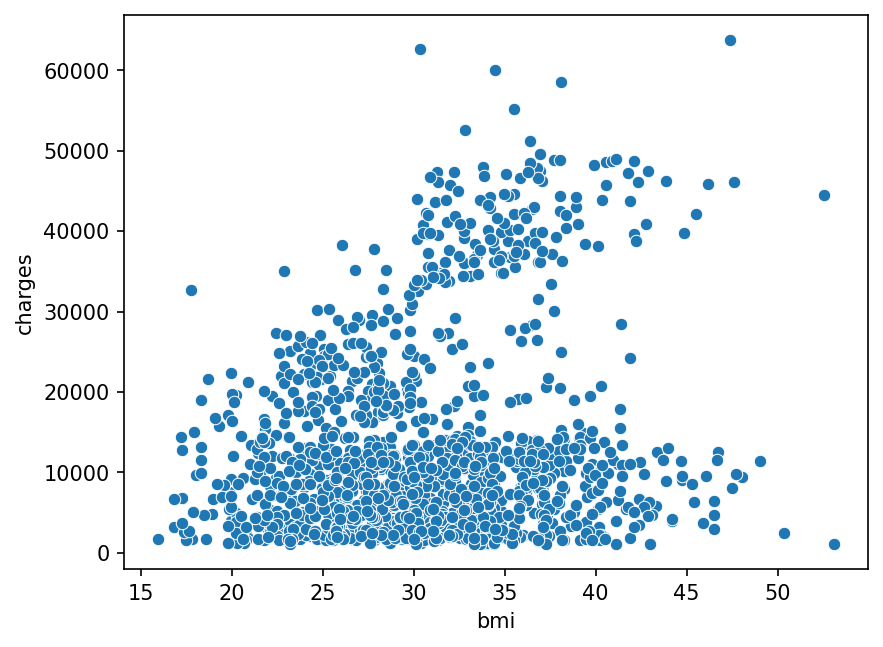

In [13]:
plt.figure(dpi = 150)
sns.scatterplot(x=insurance['bmi'], y=insurance['charges'])
plt.show()

## Bmi-Smoker-Region
- In this graph, the relationship between bmi ,smokers and region is analysed, but no significant difference is observed.

c:\Users\darks\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


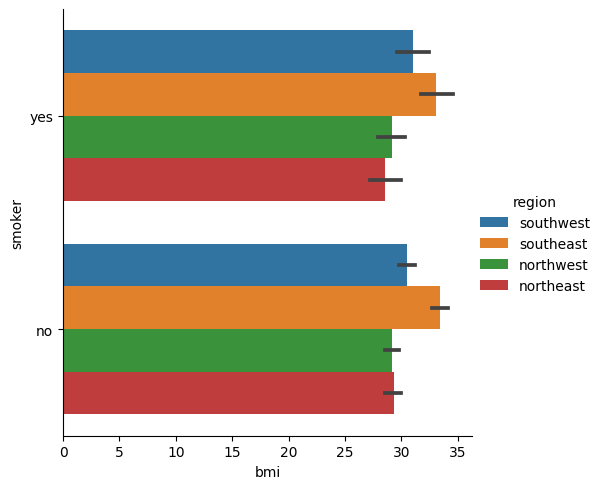

In [14]:
sns.catplot(data=df, x="bmi", y="smoker", hue="region", kind="bar");

# Data Preprocessing

### The answer to the question of whether there are empty characters in the data was searched, no empty data was found.

In [15]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Label Encoding 
- Data processing with Label to make the data ready for processing.

In [16]:
#change female=0, male=1
df['sex']=pd.factorize(df.sex)[0]
#change yes=0, no=1
df['smoker']=pd.factorize(df.smoker)[0]
#change southwest=0, southeast=1,northwest=2,northeast=3
df['region']=pd.factorize(df.region)[0]

df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,0,16884.92400
1,18,1,33.770,1,1,1,1725.55230
2,28,1,33.000,3,1,1,4449.46200
3,33,1,22.705,0,1,2,21984.47061
4,32,1,28.880,0,1,2,3866.85520
5,31,0,25.740,0,1,1,3756.62160
6,46,0,33.440,1,1,1,8240.58960
7,37,0,27.740,3,1,2,7281.50560
8,37,1,29.830,2,1,3,6406.41070
9,60,0,25.840,0,1,2,28923.13692


# Clear outlier data

## Age
- There is no outlier data in age data.


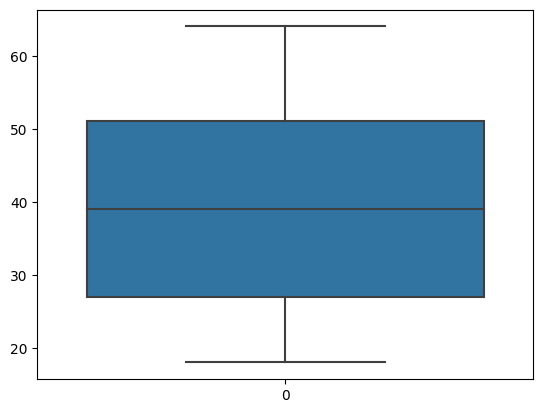

In [17]:
sns.boxplot(df['age'])
plt.show()

## Bmi
- Outliers have been detected in bmi data.(thanks to boxplot())

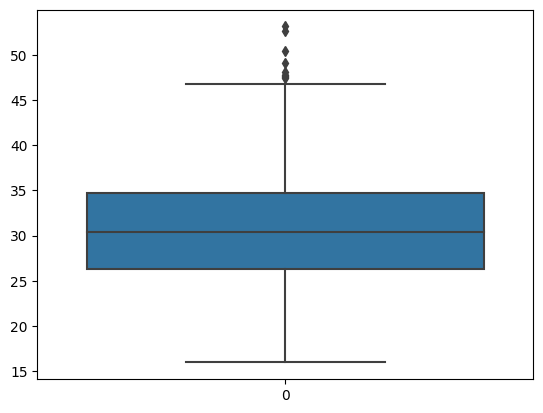

In [18]:
sns.boxplot(df['bmi'])
plt.show();

- Thanks to the IQR method, outlier data were quantified, upper and lower limits were determined and outlier data were equalised to these upper and lower limits. 

<Axes: >

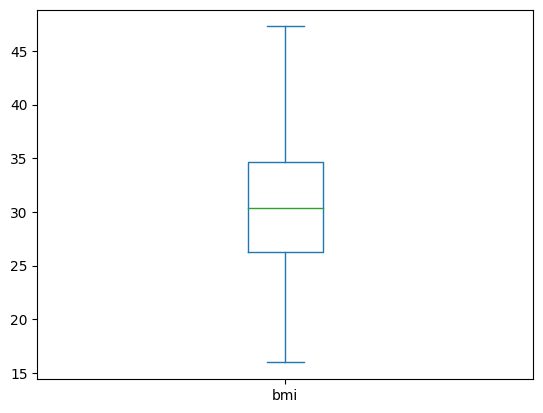

In [19]:
 Q1= df.bmi.quantile(0.25)
Q3= df.bmi.quantile(0.75)
IQR=Q3-Q1
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
df[df.bmi<lower_limit].bmi
df[df.bmi>upper_limit].bmi
df.loc[df.bmi<lower_limit,'bmi']= lower_limit
df.loc[df.bmi>upper_limit,'bmi']=upper_limit
df.bmi.plot.box()

## Charges
- Outliers have been detected in Charges data.(thanks to boxplot())

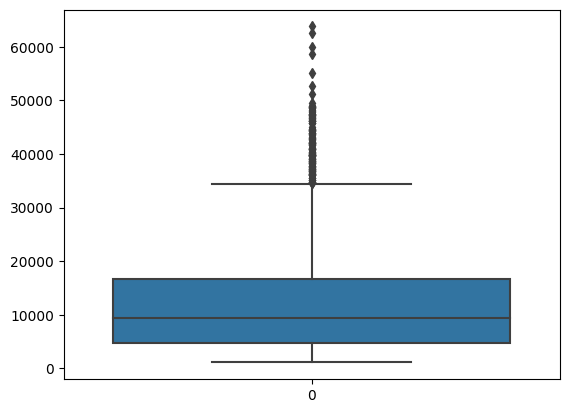

In [20]:
sns.boxplot(df['charges'])
plt.show()


-  Thanks to the IQR method, outlier data were quantified, upper and lower limits were determined and outlier data were equalised to these upper and lower limits. 

<Axes: >

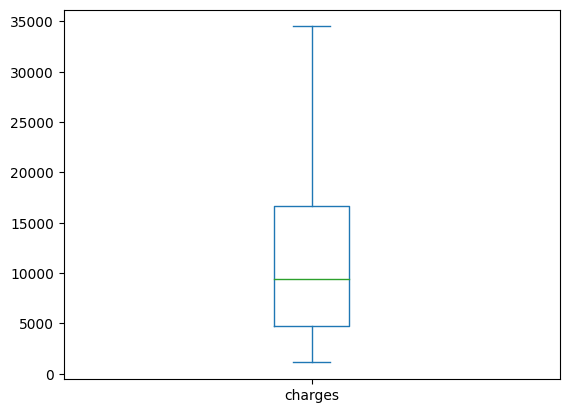

In [21]:
Q1= df.charges.quantile(0.25)
Q3= df.charges.quantile(0.75)
IQR=Q3-Q1
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
df[df.charges<lower_limit].charges
df[df.charges>upper_limit].charges
df.loc[df.charges<lower_limit,'charges']= lower_limit
df.loc[df.charges>upper_limit,'charges']=upper_limit
df.charges.plot.box()

### Here the data is converted to -1,1 interval and tried to be made ready for machine learning.

In [22]:

data_pre=df.copy()
tempBmi = data_pre.bmi
tempBmi = tempBmi.values.reshape(-1,1)
data_pre['bmi'] = RobustScaler().fit_transform(tempBmi)

tempAge = data_pre.age
tempAge = tempAge.values.reshape(-1,1)
data_pre['age'] = RobustScaler().fit_transform(tempAge)

tempCharges = data_pre.charges
tempCharges = tempCharges.values.reshape(-1,1)
data_pre['charges'] = RobustScaler().fit_transform(tempCharges)

data_pre.head()

,age,sex,bmi,children,smoker,region,charges
0,-0.833333,0,-0.297708,0,0,0,0.630515
1,-0.875000,1,0.401310,1,1,1,-0.643422
2,-0.458333,1,0.309616,3,1,1,-0.414515
3,-0.250000,1,-0.916344,0,1,2,1.059062
4,-0.291667,1,-0.181006,0,1,2,-0.463475


In [23]:
tempBmi = data_pre.bmi
tempBmi = tempBmi.values.reshape(-1,1)
data_pre['bmi'] = StandardScaler().fit_transform(tempBmi)

tempAge = data_pre.age
tempAge = tempAge.values.reshape(-1,1)
data_pre['age'] = StandardScaler().fit_transform(tempAge)

tempCharges = data_pre.charges
tempCharges = tempCharges.values.reshape(-1,1)
data_pre['charges'] = StandardScaler().fit_transform(tempCharges)

data_pre.head()

,age,sex,bmi,children,smoker,region,charges
0,-1.438764,0,-0.454201,0,0,0,0.433863
1,-1.509965,1,0.515300,1,1,1,-1.059045
2,-0.797954,1,0.388125,3,1,1,-0.790792
3,-0.441948,1,-1.312218,0,1,2,0.936070
4,-0.513149,1,-0.292342,0,1,2,-0.848168


# Split the dataset into X_train, X_test, y_train, y_test
- Prepare x and y variables for machine learning. "Drop" the x variable("charges")from the data. 

In [24]:
X = data_pre.drop('charges',axis=1).values
y = data_pre['charges'].values.reshape(-1,1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

print('Size of X_train : ', X_train.shape)
print('Size of y_train : ', y_train.shape)
print('Size of X_test : ', X_test.shape)
print('Size of Y_test : ', y_test.shape)

Size of X_train :  (1070, 6)
Size of y_train :  (1070, 1)
Size of X_test :  (268, 6)
Size of Y_test :  (268, 1)


# Build and test Regression models.

## LinearRegression:

In [25]:
linreg_model = LinearRegression()
linreg_model.fit(X_train, y_train)

y_pred_test = linreg_model.predict(X_test)

In [26]:
print("coef:",linreg_model.coef_)
print("intercept:",linreg_model.intercept_)


coef: [[ 0.31326102 -0.01262579  0.13597272  0.03761349 -1.95344069  0.02537912]]
intercept: [1.48628346]


#### LinearRegression Score

In [27]:
#Cross Validation Score
#cv_linear_reg = cross_val_score(estimator = linreg_model, X = X, y = y, cv = 10)

#R2 Score for training data
y_pred_train = linreg_model.predict(X_train)
r2_score_train_linear = r2_score(y_train, y_pred_train)

#R2 Score for testing data
y_pred_test = linreg_model.predict(X_test)
r2_score_test_linear = r2_score(y_test, y_pred_test)

#Root mean squared error
rmse_linear = (np.sqrt(mean_squared_error(y_test, y_pred_test)))

print('R2_score (Train Accuracy) : {0:.3f}'.format(r2_score_train_linear))
print('R2_score (Test Accuracy) : {0:.3f}'.format(r2_score_test_linear))
print('RMSE : {0:.3f}'.format(rmse_linear))

R2_score (Train Accuracy) : 0.738
R2_score (Test Accuracy) : 0.784
RMSE : 0.477


## Support Vector Regression

In [28]:
svr_model = SVR(kernel='rbf')

svr_model.fit(X_train,y_train.ravel())

y_pred_test = svr_model.predict(X_test)

#### Support Vector Regression score

In [29]:
#R2 Score for training data
y_pred_train = svr_model.predict(X_train)
r2_score_train_svr = r2_score(y_train, y_pred_train)

#R2 Score for testing data
y_pred_test = svr_model.predict(X_test)
r2_score_test_svr = r2_score(y_test, y_pred_test)

#Root mean squared error
rmse_svr = (np.sqrt(mean_squared_error(y_test, y_pred_test)))

print('R2_score (Train Accuracy) : {0:.3f}'.format(r2_score_train_svr))
print('R2_score (Test Accuracy) : {0:.3f}'.format(r2_score_test_svr))
print('RMSE : {0:.3f}'.format(rmse_svr))

R2_score (Train Accuracy) : 0.807
R2_score (Test Accuracy) : 0.829
RMSE : 0.424


## Random Forest Regressor

In [30]:
rf = RandomForestRegressor(n_estimators = 100)
# training the data
rf.fit(X_train, y_train.ravel())
#predicting
y_pred_rf = rf.predict(X_test)

#### Random Forest Regressor score 

In [31]:
#R2 Score for training data
y_pred_train = rf.predict(X_train)
r2_score_train_rf = r2_score(y_train, y_pred_train)

#R2 Score for testing data
y_pred_test = rf.predict(X_test)
r2_score_test_rf = r2_score(y_test, y_pred_test)

#Root mean squared error
rmse_rf = (np.sqrt(mean_squared_error(y_test, y_pred_test)))

print('R2_score (Train Accuracy) : {0:.3f}'.format(r2_score_train_rf))
print('R2_score (Test Accuracy) : {0:.3f}'.format(r2_score_test_rf))
print('RMSE : {0:.3f}'.format(rmse_rf))

R2_score (Train Accuracy) : 0.968
R2_score (Test Accuracy) : 0.835
RMSE : 0.417


## Decision Tree Regressor

In [32]:

dectree_model = DecisionTreeRegressor()
dectree_model.fit(X_train, y_train)

y_pred_test = dectree_model.predict(X_test)


#### Decision Tree Regressor score

In [33]:
#R2 Score for training data
y_pred_train = dectree_model.predict(X_train)
r2_score_train_dec = r2_score(y_train, y_pred_train)

#R2 Score for testing data
y_pred_test = dectree_model.predict(X_test)
r2_score_test_dec = r2_score(y_test, y_pred_test)

#Root mean squared error
rmse_dectree = (np.sqrt(mean_squared_error(y_test, y_pred_test)))

print('R2_score (Train Accuracy) : {0:.3f}'.format(r2_score_train_dec))
print('R2_score (Test Accuracy) : {0:.3f}'.format(r2_score_test_dec))
print('RMSE : {0:.3f}'.format(rmse_dectree))




R2_score (Train Accuracy) : 0.998
R2_score (Test Accuracy) : 0.716
RMSE : 0.547


#### _________________________________________________________________________________________________________________________________________________________

# Result
####
______________________________________________________________________________________________________________________________________________________


### - Creating and comparing regression models in tabular form.

- Here the model has been tried to be tabulated. It is necessary for a better analysis.
- The performances of the models are tabulated here. When examined, the best scores are seen in Random Forest Regression.

In [34]:
models = [('Linear Regression', rmse_linear, r2_score_train_linear, r2_score_test_linear),        
          ('Support Vector Regression', rmse_svr, r2_score_train_svr, r2_score_test_svr),
          ('Random Forest Regression', rmse_rf, r2_score_train_rf, r2_score_test_rf),   
          ('Decision Tree Regression', rmse_dectree, r2_score_train_dec, r2_score_test_dec),
         ]

In [35]:
predict = pd.DataFrame(data = models, columns=['Model', 'RMSE', 'R2_Score(training)', 'R2_Score(test)'])
predict

,Model,RMSE,R2_Score(training),R2_Score(test)
0,Linear Regression,0.477207,0.737608,0.783702
1,Support Vector Regression,0.424035,0.807432,0.829217
2,Random Forest Regression,0.416983,0.968420,0.834851
3,Decision Tree Regression,0.546796,0.997599,0.716017


-  Here the model is tried to be transformed into a bar graph. It is necessary for a better analysis.

<BarContainer object of 4 artists>

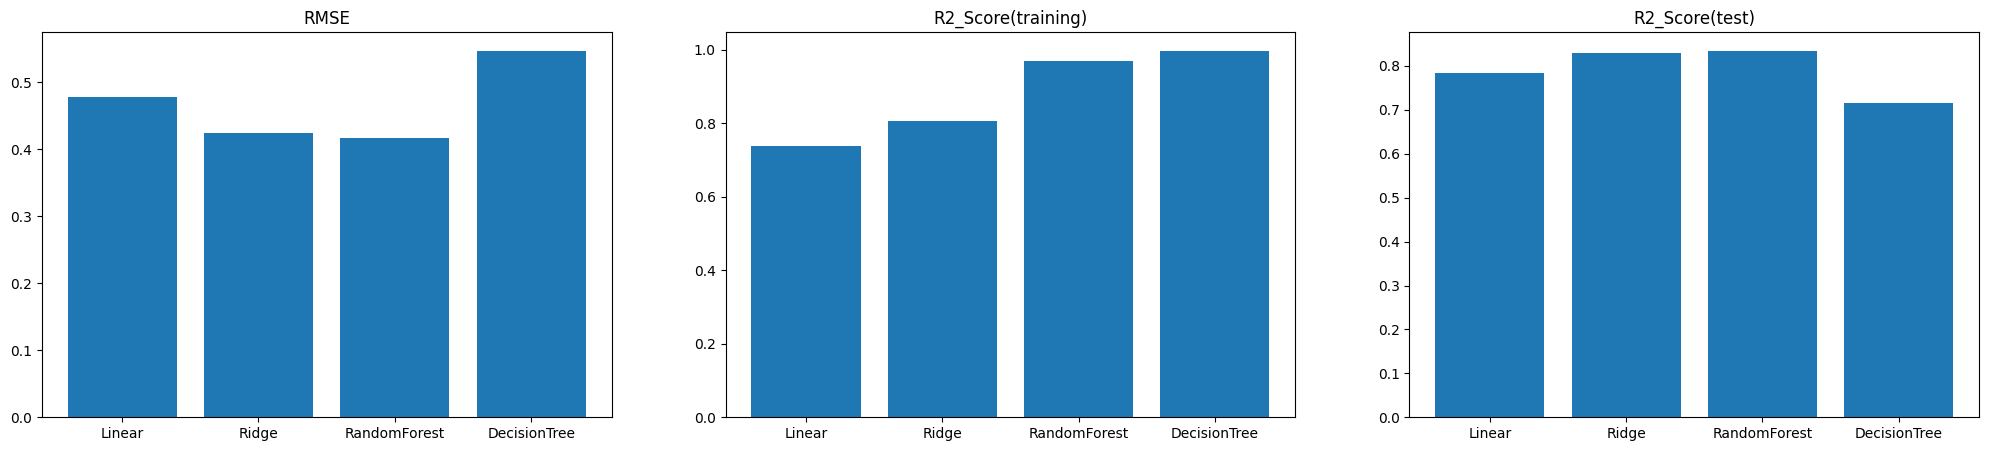

In [36]:
Xval = np.array(["Linear","Ridge","RandomForest","DecisionTree"])
plt.figure(figsize=(25,5))
plt.subplot(131).set_title("RMSE")
plt.bar(Xval,predict.RMSE)
plt.subplot(132).set_title("R2_Score(training)")
plt.bar(Xval,predict['R2_Score(training)'])
plt.subplot(133).set_title("R2_Score(test)")
plt.bar(Xval,predict['R2_Score(test)'])

#### .............................................................................................................................................................................................................................
### Based on these graphs and tables, the best model is found to be this "Random Forest Regression".
#### .............................................................................................................................................................................................................................

- When the regression analyses were examined, it was found that "Random Forest Regressor" was the most appropriate and gave the best scores, so it will be hyper-parameterised.

## Random Forest Regressor HyperParametre
- where the hypermarameter of Random Forest Regressor will be made. Then we'll look at the scores. 


In [37]:
rf = RandomForestRegressor()

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,
                          cv = 3,verbose=2, n_jobs = 4)
grid_search=grid_search.fit(X_train, y_train.ravel())

print("the following procedure has been carried out here: Fitting 3 folds for each of 81 candidates, totalling 243 fits")

Fitting 3 folds for each of 81 candidates, totalling 243 fits
the following procedure has been carried out here: Fitting 3 folds for each of 81 candidates, totalling 243 fits


- scores, best parameter and index

In [38]:
print(">>>>>scores, best parameter and index")
print(f'Train Accuracy       : {grid_search.score(X_train,y_train):.3f}' )
print(f'Test Accuracy        : {grid_search.score(X_test,y_test):.3f}' )
print("Best hyper parameters: ",grid_search.best_params_)
print("Best score           : ",grid_search.best_score_)
print("Best index           :",grid_search.best_index_)




>>>>>scores, best parameter and index
Train Accuracy       : 0.835
Test Accuracy        : 0.846
Best hyper parameters:  {'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Best score           :  0.8119213427163596
Best index           : 19


-  These scores were obtained when hyper parameter optimisation was performed

In [39]:
print(">>> These scores were obtained when hyper parameter optimisation was performed.")
a= (f'{grid_search.score(X_train,y_train):.3f}' )
b= (f'{grid_search.score(X_test,y_test):.3f}' )
accuracy= [
           ("Train Accuracy Score", a),
           ("Test Accuracy Score", b),
           ("Best HyperP. score ",grid_search.best_score_),
           ("Best index",grid_search.best_index_)
           ]
predict = pd.DataFrame(data = accuracy, columns=['Model', 'Score'])
predict

>>> These scores were obtained when hyper parameter optimisation was performed.


,Model,Score
0,Train Accuracy Score,0.835
1,Test Accuracy Score,0.846
2,Best HyperP. score,0.811921
3,Best index,19


# End 

### Thank you for reading.

- Abidin Oguzhan Zeybek